<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost Model

### Initializations

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Gradient Boost

In [5]:
clf = AdaBoostClassifier()

In [6]:
clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [7]:
clf.score(X_test_scaled, y_test)

0.95541666666666669

In [8]:
predictions = clf.predict(X_test_scaled)

In [9]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.958954057714
Test Accuracy  ::  0.955416666667


In [10]:
print(confusion_matrix(y_test, predictions))

[[1799   48]
 [  59  494]]


In [11]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1847
          1       0.91      0.89      0.90       553

avg / total       0.96      0.96      0.96      2400



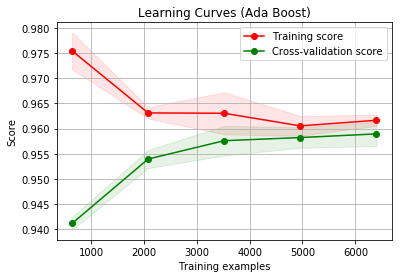

In [12]:
title = 'Learning Curves (Ada Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [15]:
clf = AdaBoostClassifier()

In [22]:
param_space = {'n_estimators':[25,50,250,500]}

In [23]:
gs = GridSearchCV(clf, param_space, cv=5, n_jobs=-1)

In [24]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


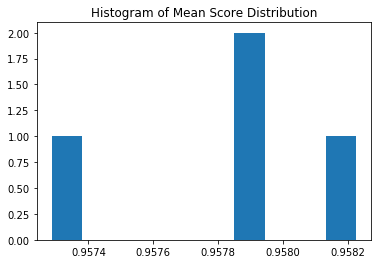

In [25]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [26]:
gs.best_score_

0.95822481508490465

In [27]:
gs.best_params_

{'n_estimators': 25}

In [64]:
clf = GradientBoostingClassifier(max_depth=9, n_estimators=1000)

In [65]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [66]:
clf.score(X_test_scaled, y_test)

0.99083333333333334

In [67]:
predictions = clf.predict(X_test_scaled)

In [68]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.990833333333


In [69]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1842    5]
 [  17  536]]


In [70]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1842,    5],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [71]:
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1842,    5],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [72]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



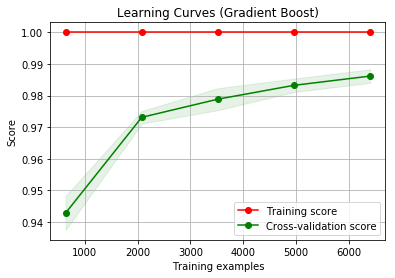

In [73]:
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Feature Selection for Gradient Boost

In [506]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [507]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 10 columns):
satisfactionLevel       11999 non-null float64
yearsSinceEvaluation    11999 non-null float64
numberOfProjects        11999 non-null int64
averageMonthlyHours     11999 non-null int64
yearsAtCompany          11999 non-null int64
workAccident            11999 non-null category
hasLeftCompany          11999 non-null category
gotPromotion            11999 non-null category
department              11999 non-null category
salary                  11999 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 527.5 KB


In [508]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [509]:
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [510]:
len(columns)

9

In [511]:
for i in range(0,4):
    print(len(set(it.combinations(columns,i))))

1
9
36
84


In [512]:
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = GradientBoostingClassifier(max_depth=9, n_estimators=1000)
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0                          department,hasLeftCompany  0.989583
0  workAccident,gotPromotion,department,hasLeftCo...  0.989583
0    workAccident,gotPromotion,salary,hasLeftCompany  0.989582
0                 workAccident,salary,hasLeftCompany  0.989582
0           workAccident,gotPromotion,hasLeftCompany  0.989479


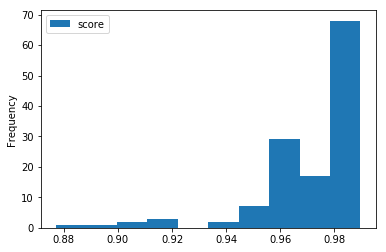

In [513]:
results.plot.hist();

In [514]:
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"department,hasLeftCompany",0.989583
0,"workAccident,gotPromotion,department,hasLeftCo...",0.989583
0,"workAccident,gotPromotion,salary,hasLeftCompany",0.989582
0,"workAccident,salary,hasLeftCompany",0.989582
0,"workAccident,gotPromotion,hasLeftCompany",0.989479
0,"workAccident,department,hasLeftCompany",0.989478
0,"salary,hasLeftCompany",0.989478
0,"workAccident,hasLeftCompany",0.989374
0,"gotPromotion,department,hasLeftCompany",0.989374
0,"gotPromotion,hasLeftCompany",0.989374


In [515]:
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,numberOfProjects,department,...",0.953537
0,"yearsSinceEvaluation,numberOfProjects,yearsAtC...",0.942704
0,"numberOfProjects,averageMonthlyHours,yearsAtCo...",0.941765
0,"yearsSinceEvaluation,averageMonthlyHours,years...",0.921552
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.917180
0,"satisfactionLevel,yearsSinceEvaluation,yearsAt...",0.913428
0,"satisfactionLevel,numberOfProjects,yearsAtComp...",0.908847
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.904052
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.893531
0,"satisfactionLevel,numberOfProjects,averageMont...",0.877174


In [516]:
df = pd.get_dummies(dff.drop(['workAccident','gotPromotion', 'department', 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [517]:
clf = RandomForestClassifier(criterion='gini', max_features=0.6, n_estimators=300)

In [518]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [519]:
clf.score(X_test_scaled, y_test)

0.99124999999999996

In [520]:
predictions = clf.predict(X_test_scaled)

In [521]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.99125


In [522]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1844    3]
 [  18  535]]


In [523]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1841,    6],
       [  40,  513]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}}


In [524]:
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}}


In [525]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



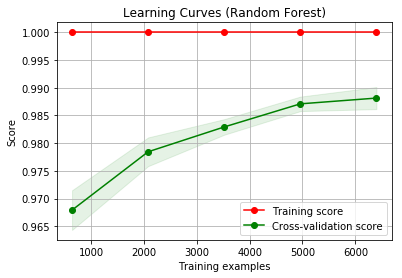

In [526]:
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()